In [1]:
!pip install yfinance pandas-datareader

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
data = yf.download("RELIANCE.NS", start="2020-09-26", end="2025-09-06")

/tmp/ipython-input-957855456.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("RELIANCE.NS", start="2020-09-26", end="2025-09-06")
[*********************100%***********************]  1 of 1 completed


In [4]:
print(data.tail())

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2025-09-01  1353.900024  1363.199951  1340.599976  1356.000000    11232238
2025-09-02  1366.500000  1384.500000  1354.500000  1354.800049    11517006
2025-09-03  1372.599976  1376.500000  1360.500000  1369.699951     7847563
2025-09-04  1359.300049  1374.000000  1357.099976  1371.800049    13223177
2025-09-05  1375.000000  1381.000000  1359.300049  1363.000000     5777575


In [5]:
data["Daily_Return"] = data['Close'].pct_change()

In [6]:
print(data.tail())

Price             Close         High          Low         Open      Volume  \
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS   
Date                                                                         
2025-09-01  1353.900024  1363.199951  1340.599976  1356.000000    11232238   
2025-09-02  1366.500000  1384.500000  1354.500000  1354.800049    11517006   
2025-09-03  1372.599976  1376.500000  1360.500000  1369.699951     7847563   
2025-09-04  1359.300049  1374.000000  1357.099976  1371.800049    13223177   
2025-09-05  1375.000000  1381.000000  1359.300049  1363.000000     5777575   

Price      Daily_Return  
Ticker                   
Date                     
2025-09-01    -0.002431  
2025-09-02     0.009306  
2025-09-03     0.004464  
2025-09-04    -0.009690  
2025-09-05     0.011550  


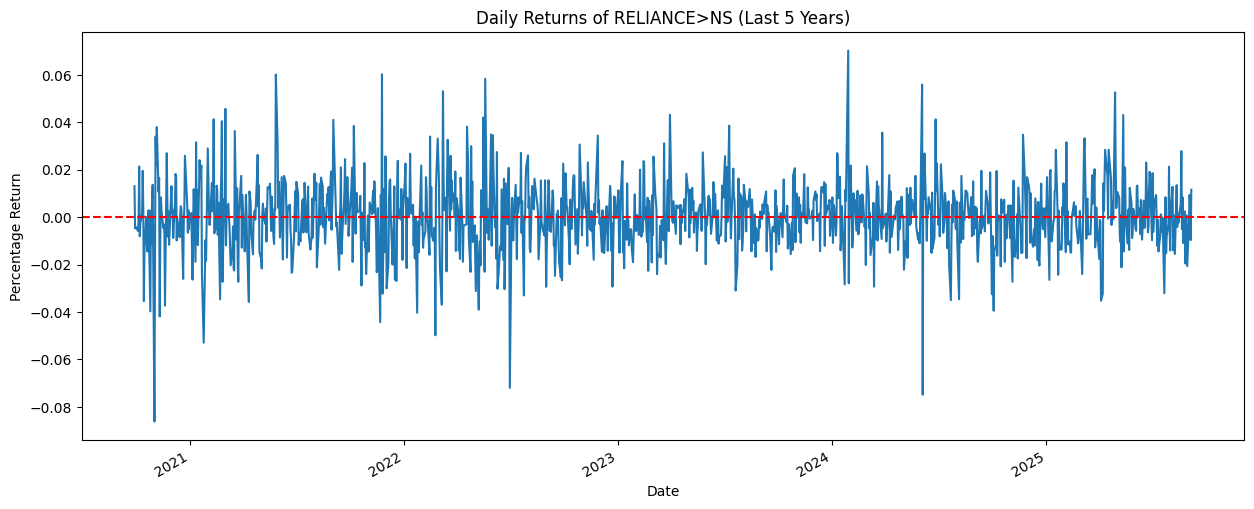

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
data['Daily_Return'].plot()

plt.title("Daily Returns of RELIANCE>NS (Last 5 Years)")
plt.xlabel('Date')
plt.ylabel('Percentage Return')

plt.axhline(0,color='red', linestyle='--')
plt.show()

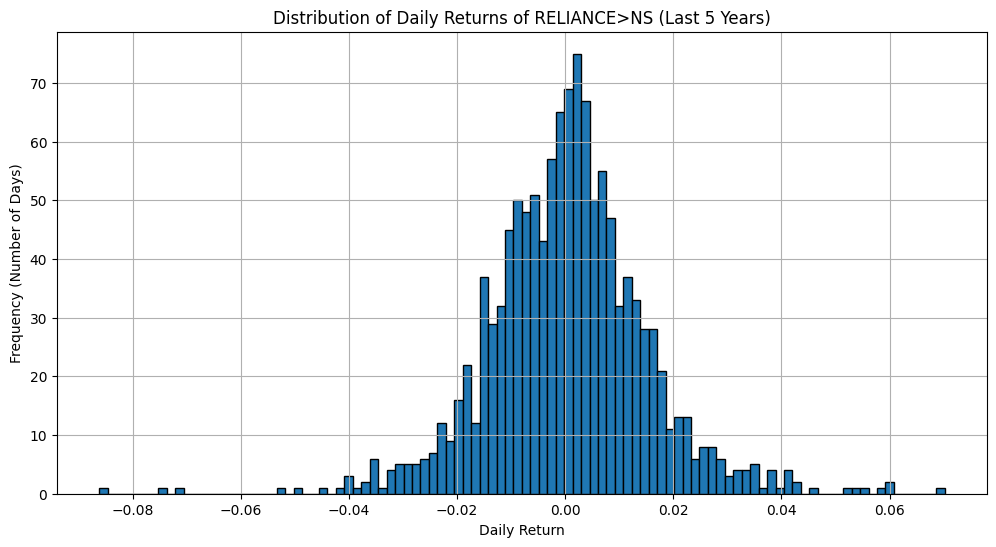

In [8]:
plt.figure(figsize=(12,6))
data['Daily_Return'].hist(bins=100,edgecolor='black')
plt.title("Distribution of Daily Returns of RELIANCE>NS (Last 5 Years)")
plt.xlabel('Daily Return')
plt.ylabel('Frequency (Number of Days)')
plt.show()

In [9]:
VaR_95 = data['Daily_Return'].quantile(0.05)
print(f"The 95% Value at Risk (VaR) is: {VaR_95:.4f}")
print(f"This means that on 95 out of 100 days, we expect the loss to be less than {-VaR_95:.2%}.")
print(f"Conversely, there is a 5% chance the loss on any given day could be worse than {-VaR_95:.2%}.")

The 95% Value at Risk (VaR) is: -0.0223
This means that on 95 out of 100 days, we expect the loss to be less than 2.23%.
Conversely, there is a 5% chance the loss on any given day could be worse than 2.23%.


In [10]:
VaR_99 = data['Daily_Return'].quantile(0.01)
print(f"The 95% VaR was: {VaR_95:.4f} (or {-VaR_95:.2%})")
print(f"The 99% VaR is: {VaR_99:.4f} (or {-VaR_99:.2%})")

The 95% VaR was: -0.0223 (or 2.23%)
The 99% VaR is: -0.0367 (or 3.67%)


In [11]:
tail_losses = data[data['Daily_Return'] < VaR_95]
ES_95 = tail_losses['Daily_Return'].mean()
print(f"The 95% VaR told us the loss would not be worse than {-VaR_95:.2%}.")
print(f"The 95% Expected Shortfall tells us that on those worst 5% of days, the AVERAGE loss was actually {-ES_95:.2%}.")

The 95% VaR told us the loss would not be worse than 2.23%.
The 95% Expected Shortfall tells us that on those worst 5% of days, the AVERAGE loss was actually 3.25%.
